In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pickle
import seaborn as sns

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

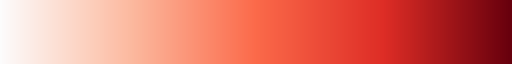

In [54]:
# modified "Reds" cmap

red_cmap = mcolors.LinearSegmentedColormap.from_list(
    "", 
    [np.array(mcolors.to_rgb("#fcfcfc")),
     np.array(mcolors.to_rgb("#fcbba1")),
     np.array(mcolors.to_rgb("#fb6a4a")),
     np.array(mcolors.to_rgb("#de2d26")),
     np.array(mcolors.to_rgb("#67000d"))])

red_cmap

# Extrapolation, ablation on NK landscapes
## Extrapolation

In [55]:
nk_extrap = pd.read_csv("../results/ohe/extrapolation_results_NK.csv")


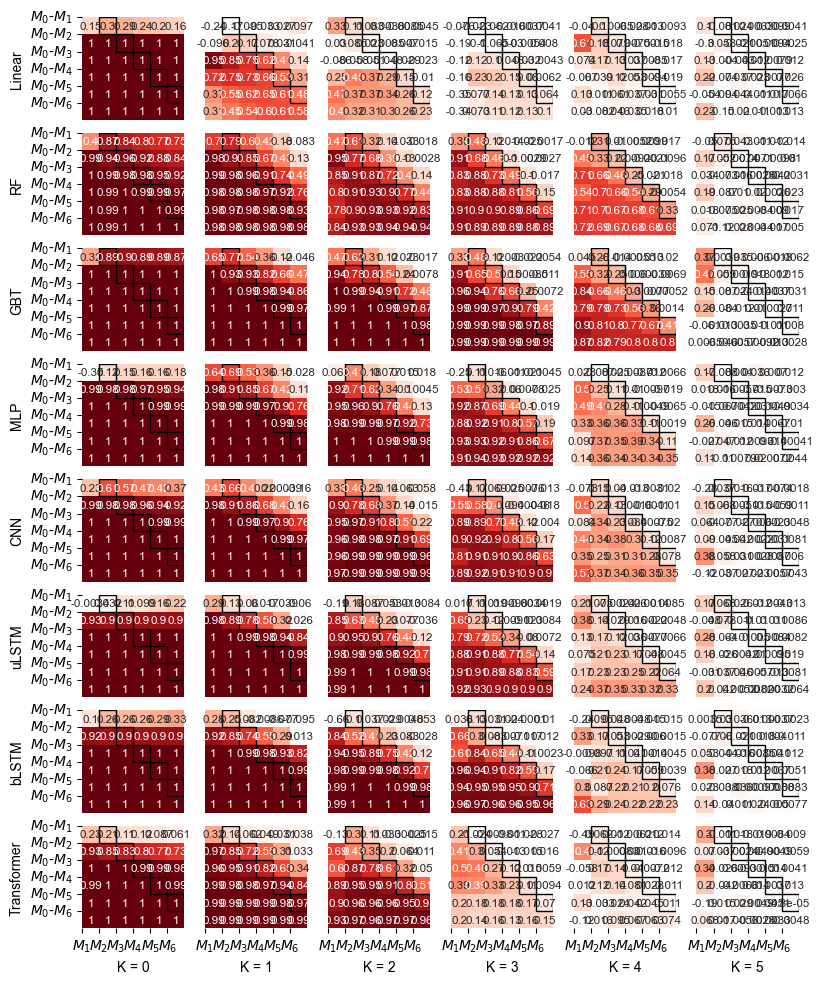

In [164]:
# iterate through the landscapes
fig, ax = plt.subplots(nrows=8, ncols=6, figsize=(9.25, 12), gridspec_kw={'hspace': 0})

model_list = ['linear', 'rf', 'gb', 'mlp', 'cnn', 'ulstm', 'blstm', 'transformer']
model_names = ['Linear', 'RF', 'GBT', 'MLP', 'CNN', 'uLSTM', 'bLSTM', 'Transformer']

for k in range(6):

    # iterate through model type
    for model_number, model in enumerate(model_list):

        # set border
        for _, spine in ax[model_number, k].spines.items():
            spine.set_visible(True)
            spine.set_edgecolor("#fcfcfc")
            spine.set_linewidth(0.5)

        # one heatmap to be made for results for each landscape-model pair
        extrap_df = nk_extrap[(nk_extrap['model'] == model) & (nk_extrap['landscape'] == f"k{k}")]

        train_regimes = list(extrap_df["train_regime"].unique())
        train_regimes.sort()

        # training data
        pearson_results = np.zeros((6, 6))
        for i, max_train_dist in enumerate(train_regimes):
            
            # test data
            test_regime = [f"M{i + 1}" for i in range(6)]
            for j, test_dist in enumerate(test_regime):

                df = extrap_df[(extrap_df["train_regime"] == max_train_dist) & (extrap_df["test_data"] == test_dist)]
                pearson_corr = df["pearson_r"].mean()
                pearson_results[i][j] = pearson_corr
        
        # make heatmap
        sns.set(font_scale=0.7)
        sns.heatmap(
            pearson_results,
            cmap=red_cmap,
            vmin=0,
            vmax=1,
            ax=ax[model_number, k],
            square=True,
            linewidths=0,
            linecolor="white",
            cbar=False,
        )

        # colour for extrapolation border
        for val in range(5):   
            rect = Rectangle((val + 1, val), 1, 1, 
                             edgecolor='black', 
                             facecolor='none', 
                             linewidth=1)
            ax[model_number, k].add_patch(rect)

        # add tick labels
        if k == 0:
            y_ticks = [f'$M_{0}$-$M_{i + 1}$' for i in range(6)]
            ax[model_number, k].set_yticks(range(6))
            ax[model_number, k].set_yticklabels(y_ticks, 
                                                rotation=0, 
                                                fontsize=10)
        else:
            ax[model_number, k].set_yticks([])
            
        if model_number == 7:
            y_ticks = [f'$M_{i + 1}$' for i in range(6)]
            ax[model_number, k].set_xticks(range(6))
            ax[model_number, k].set_xticklabels(y_ticks, 
                                                rotation=0, 
                                                fontsize=10)
        else:
            ax[model_number, k].set_xticks([])

        # add axis labels
        if k == 0:
            ax[model_number, k].set_ylabel(model_names[model_number])

        if model_number == 7:
            ax[model_number, k].set_xlabel(f"K = {k}")

# plt.savefig('../figures/extrapolation_NK_6.svg')

In [57]:
nk_extrap

,model,landscape,replicate,train_regime,cv_fold,test_data,pearson_r,r2,mse_loss,train_epochs
0,blstm,k0,r2,M0-M1,0,train,0.255041,-0.108972,0.007095,26.0
1,blstm,k0,r2,M0-M1,0,M1,0.176523,-0.168330,0.011815,NaN
2,blstm,k0,r2,M0-M1,0,M2,0.368491,0.045023,0.014347,NaN
3,blstm,k0,r2,M0-M1,0,M3,0.190405,0.027708,0.015002,NaN
4,blstm,k0,r2,M0-M1,0,M4,0.313750,0.033076,0.019247,NaN
...,...,...,...,...,...,...,...,...,...,...
8059,ulstm,k5,r7,M0-M6,0,M2,0.015133,-0.001390,0.023083,NaN
8060,ulstm,k5,r7,M0-M6,0,M3,0.014749,-0.000859,0.021534,NaN
8061,ulstm,k5,r7,M0-M6,0,M4,0.025447,-0.001997,0.019348,NaN
8062,ulstm,k5,r7,M0-M6,0,M5,-0.014269,-0.004567,0.019917,NaN


In [70]:
nk_extrap_single_idx = {"K": [], "Model": [], "Pearson_corr": []}
nk_extrap_double_idx = {"K": [], "Model": [], "Pearson_corr": []}
nk_extrap_triple_idx = {"K": [], "Model": [], "Pearson_corr": []}
nk_extrap_quad_idx = {"K": [], "Model": [], "Pearson_corr": []}
nk_extrap_pent_idx = {"K": [], "Model": [], "Pearson_corr": []}
nk_interp_idx = {"K": [], "Model": [], "Pearson_corr": []}


model_list = ['linear', 'rf', 'gb', 'mlp', 'cnn', 'ulstm', 'blstm', 'transformer']
model_names = ['Linear', 'RF', 'GBT', 'MLP', 'CNN', 'uLSTM', 'bLSTM', 'Transformer']

for k in range(6):

    # iterate through model type
    for model_number, model in enumerate(model_list):

        # get df
        extrap_df = nk_extrap[(nk_extrap['model'] == model) & (nk_extrap['landscape'] == f"k{k}")]
        train_regimes = list(extrap_df["train_regime"].unique())
        train_regimes.sort()

        # training data
        for i, max_train_dist in enumerate(train_regimes):

            # extrapolation would require Mi where i is greater than the range of train dist
            extrap_regimes = [f"M{i + 1}" for i in range(int(max_train_dist[-1]), 6)]
            interp_regimes = [f"M{i + 1}" for i in range(6) if i + 1 <= int(max_train_dist[-1])]
            
            # test on single mutation extrapolation
            if len(extrap_regimes) > 0:
                df = extrap_df[(extrap_df["train_regime"] == max_train_dist) & (extrap_df["test_data"] == extrap_regimes[0])]
                nk_extrap_single_idx["K"] += [k] * len(df)
                nk_extrap_single_idx["Model"] += [model_names[model_number]] * len(df)
                nk_extrap_single_idx["Pearson_corr"] += df.pearson_r.tolist()
            
            if len(extrap_regimes) > 1:
                df = extrap_df[(extrap_df["train_regime"] == max_train_dist) & (extrap_df["test_data"] == extrap_regimes[1])]
                nk_extrap_double_idx["K"] += [k] * len(df)
                nk_extrap_double_idx["Model"] += [model_names[model_number]] * len(df)
                nk_extrap_double_idx["Pearson_corr"] += df.pearson_r.tolist()
            
            if len(extrap_regimes) > 2:
                df = extrap_df[(extrap_df["train_regime"] == max_train_dist) & (extrap_df["test_data"] == extrap_regimes[2])]
                nk_extrap_triple_idx["K"] += [k] * len(df)
                nk_extrap_triple_idx["Model"] += [model_names[model_number]] * len(df)
                nk_extrap_triple_idx["Pearson_corr"] += df.pearson_r.tolist()
            
            if len(extrap_regimes) > 3:
                df = extrap_df[(extrap_df["train_regime"] == max_train_dist) & (extrap_df["test_data"] == extrap_regimes[3])]
                nk_extrap_quad_idx["K"] += [k] * len(df)
                nk_extrap_quad_idx["Model"] += [model_names[model_number]] * len(df)
                nk_extrap_quad_idx["Pearson_corr"] += df.pearson_r.tolist()

            if len(extrap_regimes) > 4:
                df = extrap_df[(extrap_df["train_regime"] == max_train_dist) & (extrap_df["test_data"] == extrap_regimes[4])]
                nk_extrap_pent_idx["K"] += [k] * len(df)
                nk_extrap_pent_idx["Model"] += [model_names[model_number]] * len(df)
                nk_extrap_pent_idx["Pearson_corr"] += df.pearson_r.tolist()

            for j, test_dist in enumerate(interp_regimes):
                df = extrap_df[(extrap_df["train_regime"] == max_train_dist) & (extrap_df["test_data"] == test_dist)]
                nk_interp_idx["K"] += [k] * len(df)
                nk_interp_idx["Model"] += [model_names[model_number]] * len(df)
                nk_interp_idx["Pearson_corr"] += df.pearson_r.tolist()

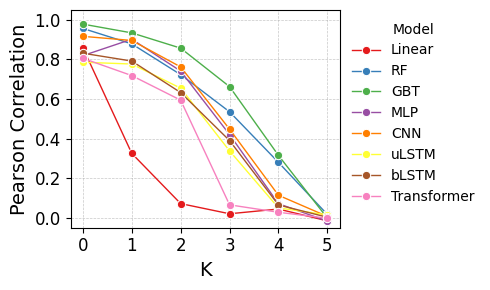

In [161]:
plt.figure(figsize=(5, 3))

sns.set_palette("Set1")

sns.lineplot(
    data=nk_extrap_single_idx,
    x="K",
    y="Pearson_corr",
    hue="Model",
    markers=True,
    errorbar=None,
    linewidth=1,
    marker='o',
)

plt.xlabel("K", fontsize=14)
plt.ylabel("Pearson Correlation", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig("../figures/nk_extrap_single_plot.svg", bbox_inches="tight")
plt.show()


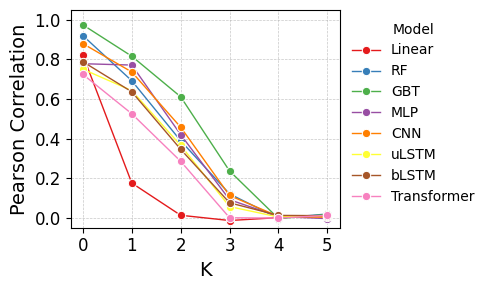

In [160]:
plt.figure(figsize=(5, 3))

sns.set_palette("Set1")

sns.lineplot(
    data=nk_extrap_double_idx,
    x="K",
    y="Pearson_corr",
    hue="Model",
    markers=True,
    errorbar=None,
    linewidth=1,
    marker='o',
)

plt.xlabel("K", fontsize=14)
plt.ylabel("Pearson Correlation", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig("../figures/nk_extrap_double_plot.svg", bbox_inches="tight")
plt.show()

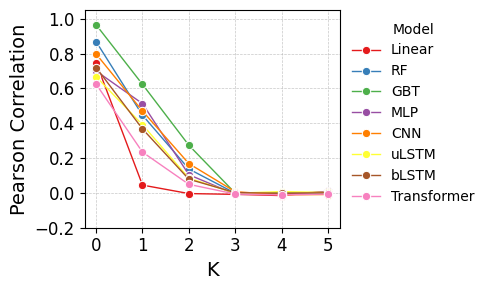

In [155]:
plt.figure(figsize=(5, 3))

sns.set_palette("Set1")

sns.lineplot(
    data=nk_extrap_triple_idx,
    x="K",
    y="Pearson_corr",
    hue="Model",
    markers=True,
    errorbar=None,
    linewidth=1,
    marker='o',
)

plt.xlabel("K", fontsize=14)
plt.ylabel("Pearson Correlation", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.2, 1.05)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig("../figures/nk_extrap_triple_plot.svg", bbox_inches="tight")
plt.show()

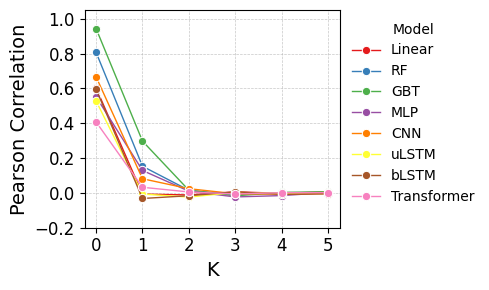

In [157]:
plt.figure(figsize=(5, 3))

sns.set_palette("Set1")

sns.lineplot(
    data=nk_extrap_quad_idx,
    x="K",
    y="Pearson_corr",
    hue="Model",
    markers=True,
    errorbar=None,
    linewidth=1,
    marker='o',
)

plt.xlabel("K", fontsize=14)
plt.ylabel("Pearson Correlation", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.2, 1.05)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig("../figures/nk_extrap_quad_plot.svg", bbox_inches="tight")
plt.show()

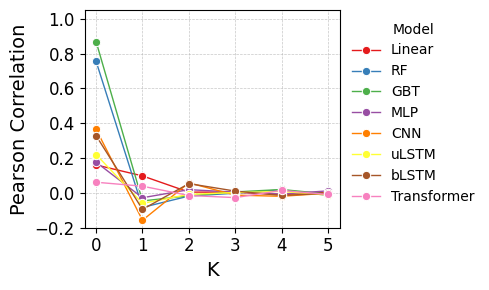

In [158]:
plt.figure(figsize=(5, 3))

sns.set_palette("Set1")

sns.lineplot(
    data=nk_extrap_pent_idx,
    x="K",
    y="Pearson_corr",
    hue="Model",
    markers=True,
    errorbar=None,
    linewidth=1,
    marker='o',
)

plt.xlabel("K", fontsize=14)
plt.ylabel("Pearson Correlation", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.2, 1.05)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig("../figures/nk_extrap_pent_plot.svg", bbox_inches="tight")
plt.show()

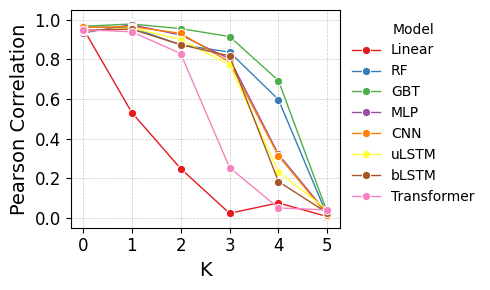

In [159]:
plt.figure(figsize=(5, 3))

sns.set_palette("Set1")

sns.lineplot(
    data=nk_interp_idx,
    x="K",
    y="Pearson_corr",
    hue="Model",
    markers=True,
    errorbar=None,
    linewidth=1,
    marker='o',
)

plt.xlabel("K", fontsize=14)
plt.ylabel("Pearson Correlation", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig("../figures/nk_interp_plot.svg", bbox_inches="tight")
plt.show()

# GB1 Results

In [106]:
gb1_extrap = pd.read_csv("../results/ohe/extrapolation_results_GB1.csv")

In [181]:
gb1_extrap

,model,landscape,replicate,train_regime,cv_fold,test_data,pearson_r,r2,mse_loss,train_epochs
0,blstm,gb1,r0,M0-M1,0,train,0.238405,-0.549976,0.000027,22.0
1,blstm,gb1,r0,M0-M1,0,M1,0.094042,-4.119459,0.000024,NaN
2,blstm,gb1,r0,M0-M1,0,M2,0.033338,-0.005084,0.013776,NaN
3,blstm,gb1,r0,M0-M1,0,M3,-0.026615,-0.019509,0.089206,NaN
4,blstm,gb1,r0,M0-M1,0,M4,-0.042586,-0.042271,0.200769,NaN
...,...,...,...,...,...,...,...,...,...,...
635,ulstm,gb1,r3,M0-M4,0,train,0.994252,0.988184,0.001846,48.0
636,ulstm,gb1,r3,M0-M4,0,M1,0.601348,-30.804161,0.000058,NaN
637,ulstm,gb1,r3,M0-M4,0,M2,0.964619,0.901066,0.000423,NaN
638,ulstm,gb1,r3,M0-M4,0,M3,0.987469,0.973223,0.002190,NaN


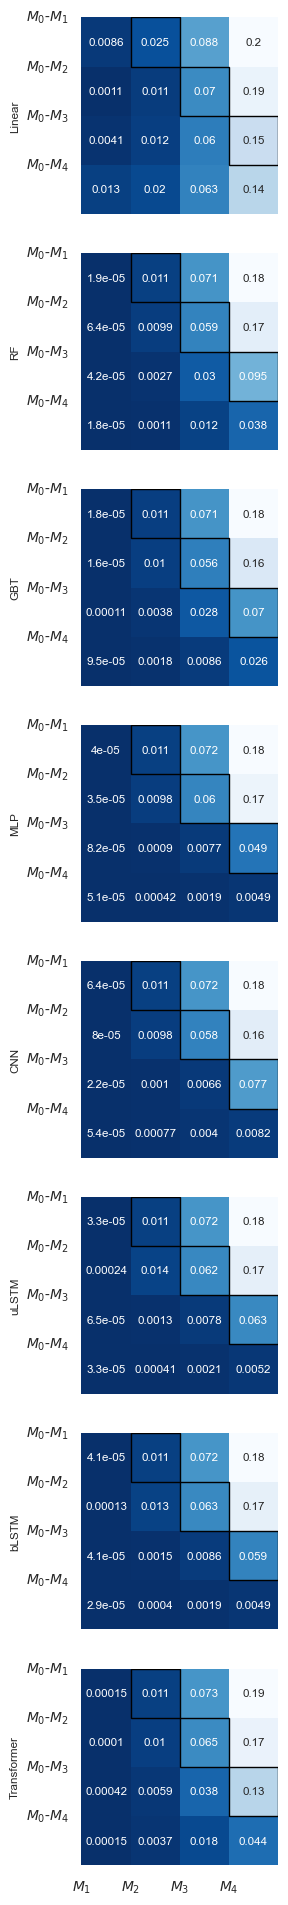

In [185]:
# iterate through the landscapes
fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(4, 24), gridspec_kw={'hspace': 0.2})


model_list = ['linear', 'rf', 'gb', 'mlp', 'cnn', 'ulstm', 'blstm', 'transformer']
model_names = ['Linear', 'RF', 'GBT', 'MLP', 'CNN', 'uLSTM', 'bLSTM', 'Transformer']


# iterate through model type
for model_number, model in enumerate(model_list):

    # set border
    for _, spine in ax[model_number].spines.items():
        spine.set_visible(True)
        spine.set_edgecolor("#fcfcfc")
        spine.set_linewidth(0.5)

    ## one figure to be made for results for each landscape-model pair
    extrap_df = gb1_extrap[(gb1_extrap['model'] == model)]

    train_regimes = list(extrap_df["train_regime"].unique())
    train_regimes.sort()

    # training data
    pearson_results = np.zeros((4, 4))
    for i, max_train_dist in enumerate(train_regimes):
        
        # test data
        test_regime = [f"M{i + 1}" for i in range(4)]
        for j, test_dist in enumerate(test_regime):
            df = extrap_df[(extrap_df["train_regime"] == max_train_dist) & (extrap_df["test_data"] == test_dist)]
            pearson_corr = df["mse_loss"].mean()
            pearson_results[i][j] = pearson_corr
    
    # make heatmap
    sns.heatmap(
        pearson_results,
        cmap="Blues_r",
        # vmin=0,
        # vmax=1,
        ax=ax[model_number],
        square=True,
        linewidths=0,
        linecolor="white",
        cbar=False,
        annot=True
    )

    # colour for extrapolation border
    for val in range(3):   
        rect = Rectangle((val + 1, val), 1, 1, 
                            edgecolor='black', 
                            facecolor='none', 
                            linewidth=1)
        ax[model_number].add_patch(rect)

    # add tick labels
    y_ticks = [f'$M_{0}$-$M_{i + 1}$' for i in range(4)]
    ax[model_number].set_yticks(range(4))
    ax[model_number].set_yticklabels(y_ticks, 
                                     rotation=0, 
                                     fontsize=10)
        
    if model_number == 7:
        y_ticks = [f'$M_{i + 1}$' for i in range(4)]
        ax[model_number].set_xticks(range(4))
        ax[model_number].set_xticklabels(y_ticks, 
                                         rotation=0, 
                                         fontsize=10)
    else:
        ax[model_number].set_xticks([])

    # add axis labels
    ax[model_number].set_ylabel(model_names[model_number])


# plt.savefig('../figures/extrapolation_GB1.svg', bbox_inches="tight")

In [109]:
gb1_extrap_single_idx = {"Model": [], "Pearson_corr": []}
gb1_extrap_double_idx = {"Model": [], "Pearson_corr": []}
gb1_extrap_triple_idx = {"Model": [], "Pearson_corr": []}
gb1_interp_idx = {"Model": [], "Pearson_corr": []}


model_list = ['linear', 'rf', 'gb', 'mlp', 'cnn', 'ulstm', 'blstm', 'transformer']
model_names = ['Linear', 'RF', 'GBT', 'MLP', 'CNN', 'uLSTM', 'bLSTM', 'Transformer']

# iterate through model type
for model_number, model in enumerate(model_list):

    # get df
    extrap_df = gb1_extrap[(gb1_extrap['model'] == model)]
    train_regimes = list(extrap_df["train_regime"].unique())
    train_regimes.sort()
    
    # training data
    for i, max_train_dist in enumerate(train_regimes):

        # extrapolation would require Mi where i is greater than the range of train dist
        extrap_regimes = [f"M{i + 1}" for i in range(int(max_train_dist[-1]), 6)]
        interp_regimes = [f"M{i + 1}" for i in range(6) if i + 1 <= int(max_train_dist[-1])]
        
        # test on single mutation extrapolation
        if len(extrap_regimes) > 0:
            df = extrap_df[(extrap_df["train_regime"] == max_train_dist) & (extrap_df["test_data"] == extrap_regimes[0])]
            gb1_extrap_single_idx["Model"] += [model_names[model_number]] * len(df)
            gb1_extrap_single_idx["Pearson_corr"] += df.pearson_r.tolist()
        
        if len(extrap_regimes) > 1:
            df = extrap_df[(extrap_df["train_regime"] == max_train_dist) & (extrap_df["test_data"] == extrap_regimes[1])]
            gb1_extrap_double_idx["Model"] += [model_names[model_number]] * len(df)
            gb1_extrap_double_idx["Pearson_corr"] += df.pearson_r.tolist()
        
        if len(extrap_regimes) > 2:
            df = extrap_df[(extrap_df["train_regime"] == max_train_dist) & (extrap_df["test_data"] == extrap_regimes[2])]
            gb1_extrap_triple_idx["Model"] += [model_names[model_number]] * len(df)
            gb1_extrap_triple_idx["Pearson_corr"] += df.pearson_r.tolist()

        for j, test_dist in enumerate(interp_regimes):
            df = extrap_df[(extrap_df["train_regime"] == max_train_dist) & (extrap_df["test_data"] == test_dist)]
            gb1_interp_idx["Model"] += [model_names[model_number]] * len(df)
            gb1_interp_idx["Pearson_corr"] += df.pearson_r.tolist()

/var/folders/8l/81073xx104bf1g4y1zs67vls2d040w/T/ipykernel_44886/3367211206.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)


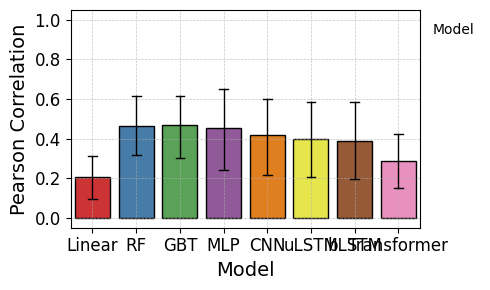

In [140]:
plt.figure(figsize=(5, 3))

sns.set_palette("Set1")

sns.barplot(
    data=gb1_extrap_single_idx,
    x="Model",
    y="Pearson_corr",
    hue="Model",
    linewidth=1,
    edgecolor="black",
    capsize=.2,
    err_kws={"color": "black", "linewidth": 1}

)

plt.xlabel("Model", fontsize=14)
plt.ylabel("Pearson Correlation", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, zorder=0)
plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig("../figures/gb1_extrap_single_plot.svg", bbox_inches="tight")
plt.show()

/var/folders/8l/81073xx104bf1g4y1zs67vls2d040w/T/ipykernel_44886/3034648890.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)


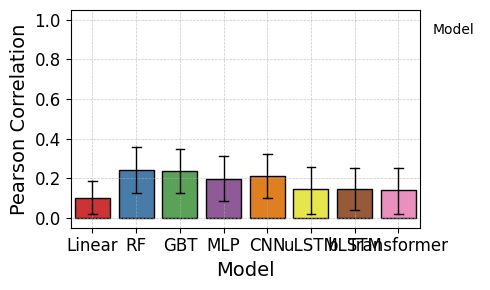

In [139]:
plt.figure(figsize=(5, 3))

sns.set_palette("Set1")

sns.barplot(
    data=gb1_extrap_double_idx,
    x="Model",
    y="Pearson_corr",
    hue="Model",
    linewidth=1,
    edgecolor="black",
    capsize=.2,
    err_kws={"color": "black", "linewidth": 1}
)

plt.xlabel("Model", fontsize=14)
plt.ylabel("Pearson Correlation", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, zorder=0)
plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig("../figures/gb1_extrap_double_plot.svg", bbox_inches="tight")
plt.show()

/var/folders/8l/81073xx104bf1g4y1zs67vls2d040w/T/ipykernel_44886/4211134890.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)


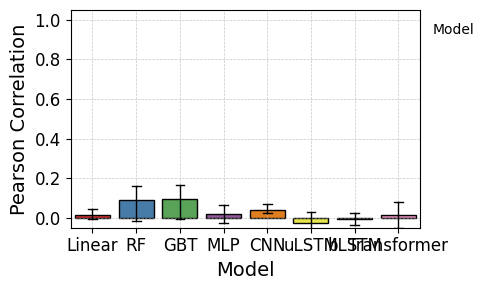

In [138]:
plt.figure(figsize=(5, 3))

sns.set_palette("Set1")

sns.barplot(
    data=gb1_extrap_triple_idx,
    x="Model",
    y="Pearson_corr",
    hue="Model",
    linewidth=1,
    edgecolor="black",
    capsize=.2,
    err_kws={"color": "black", "linewidth": 1}
)

plt.xlabel("Model", fontsize=14)
plt.ylabel("Pearson Correlation", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, zorder=0)
plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig("../figures/gb1_extrap_triple_plot.svg", bbox_inches="tight")
plt.show()

/var/folders/8l/81073xx104bf1g4y1zs67vls2d040w/T/ipykernel_44886/3085657409.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)


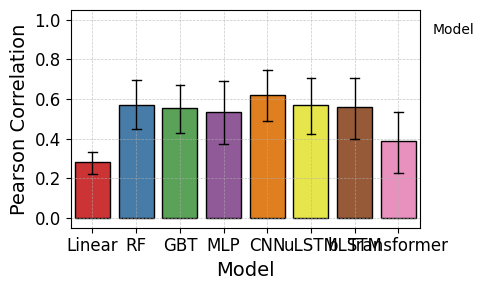

In [137]:
plt.figure(figsize=(5, 3))

sns.set_palette("Set1")

sns.barplot(
    data=gb1_interp_idx,
    x="Model",
    y="Pearson_corr",
    hue="Model",
    linewidth=1,
    edgecolor="black",
    capsize=.2,
    err_kws={"color": "black", "linewidth": 1}
)

plt.xlabel("Model", fontsize=14)
plt.ylabel("Pearson Correlation", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, zorder=0)
plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig("../figures/gb1_interp_plot.svg", bbox_inches="tight")
plt.show()

/var/folders/8l/81073xx104bf1g4y1zs67vls2d040w/T/ipykernel_44886/3820504402.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)


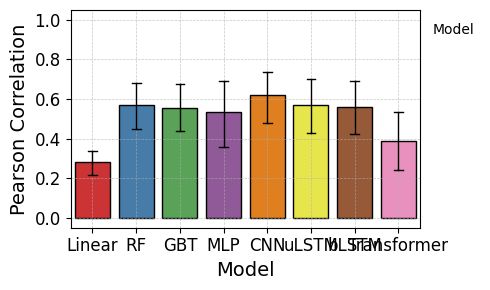

In [162]:
plt.figure(figsize=(5, 3))

sns.set_palette("Set1")

sns.barplot(
    data=gb1_interp_idx,
    x="Model",
    y="Pearson_corr",
    hue="Model",
    linewidth=1,
    edgecolor="black",
    capsize=.2,
    err_kws={"color": "black", "linewidth": 1}
)

plt.xlabel("Model", fontsize=14)
plt.ylabel("Pearson Correlation", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Model", bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig("../figures/gb1_interp_plot.svg", bbox_inches="tight")
plt.show()

In [28]:
#load data 
with open('../results/extrapolation_results_NK.pkl', 'rb') as file: 
    extrap_results = pickle.load(file)

In [7]:
pearson_results = np.zeros((8, 6, 4, 6, 6)) # shape = (n_models, k_vals, replicates, train_distances, test_distances)


In [8]:
pearson_results2 = np.zeros((8, 6, 4, 6, 6))

In [ ]:
extrap_results.keys()

In [10]:
models = ['linear', 'gb', 'rf', 'mlp', 'cnn', 'ulstm', 'blstm', 'transformer']

In [ ]:

for model_index, model in enumerate(models): 
    for k_index, k_value in enumerate(extrap_results[model].keys()):         
        for repl_index, replicate in enumerate(extrap_results[model][k_value].keys()): 
            for train_index, train_distance in enumerate(extrap_results[model][k_value][replicate].keys()):
                for test_index, test_distance in enumerate(list(extrap_results[model][k_value][replicate][train_distance][0].keys())[1:]):
                    pearson_results2[model_index][k_index][repl_index][train_index][test_index] = extrap_results[model][k_value][replicate][train_distance][0][test_distance]['pearson_r']
            

In [12]:
pearson_results_mean = np.mean(pearson_results, axis=2)
pearson_results_std  = np.std(pearson_results, axis=2)

pearson_results2_mean = np.mean(pearson_results2, axis=2)
pearson_results2_std  = np.std(pearson_results2, axis=2)

In [ ]:
np.nanmax(pearson_results_mean)

In [ ]:
fig, ax = plt.subplots(nrows=8, ncols=6, figsize=(15, 15))

for i in range(pearson_results2_mean.shape[0]):
    for j in range(pearson_results2_mean.shape[1]): 
        data = pearson_results2_mean[i][j]
        ax[i,j].imshow(data, 
                       cmap='GnBu',
                       vmin=np.nanmin(pearson_results2_mean),
                       vmax=np.nanmax(pearson_results2_mean))
        for k in range(6):   
            rect = Rectangle((k - 0.5, k - 0.5), 1, 1, 
                             edgecolor='black', 
                             facecolor='none', 
                             linewidth=3)
            ax[i,j].add_patch(rect)

column_labels = [r'$K=0$', 
                 r'$K=1$', 
                 r'$K=2$', 
                 r'$K=3$', 
                 r'$K=4$',
                 r'$K=5$' ]

for axis, col_label in zip(ax[0], column_labels):
    axis.set_title(col_label, 
                   fontsize=14)


row_labels = models
for axis, row_label in zip(ax[:, 0], row_labels):
    axis.set_ylabel(row_label, 
                    rotation=0, 
                    labelpad=15, 
                    fontsize=14, 
                    ha='right', 
                    va='center')

#do x-axis labels
x_ticks = [f'$M_1-M_{i}$' for i in range(6)]
for col_idx, axis in enumerate(ax[-1]):
    tick_labels = x_ticks
    axis.set_xticks(range(6))  # Set 6 tick positions
    axis.set_xticklabels(tick_labels, 
                         rotation=60, 
                         fontsize=10)

#do y-axis labels
y_ticks = [f'$M_{i}$' for i in range(6)][::-1]
for row_idx, axis in enumerate(ax[:,0]): 
    tick_labels = reversed(y_ticks)
    axis.set_yticks(range(6))
    axis.set_yticklabels(tick_labels, 
                         rotation=0, 
                         fontsize=10)

for ax_row in ax[:-1, 1:]:
    for axis in ax_row:
        axis.tick_params(left=False,
                         bottom=False,
                         labelleft=False,
                         labelbottom=False)

for ind, axis in enumerate(ax[-1]): 
    if ind>0: 
        axis.tick_params(left=False, 
                         labelleft=False)

for ind, axis in enumerate(ax[:,0]): 
    if ind<7: 
        axis.tick_params(bottom=False,
                         labelbottom=False)
    


fig.text(0.5, -0.04, 
         'train data mutational regimes', 
         ha='center',
         va='center', 
         fontsize=18)
fig.text(0.04, 0.5, 
         'test data mutational regimes', 
         ha='center', 
         va='center', 
         rotation='vertical', 
         fontsize=18)
fig.tight_layout()
plt.savefig('../figures/extrapolation_NK_2.svg')
plt.savefig('../figures/extrapolation_NK_2.png')

## Ablation

In [3]:
#load data 
with open('../results/ablation_results_NK.pkl', 'rb') as file: 
    abl_results = pickle.load(file)

In [6]:
abl_pearson_results = np.zeros((8,6,4,5))

In [9]:
for model_index, model in enumerate(models): 
    for k_index, k_value in enumerate(abl_results[model].keys()):         
        for repl_index, replicate in enumerate(abl_results[model][k_value].keys()): 
            for density_ind, density in enumerate(abl_results[model][k_value][replicate].keys()): 
                abl_pearson_results[model_index][k_index][repl_index][density_ind] = abl_results[model][k_value][replicate][density][0]['test']['pearson_r']
                

In [38]:
abl_prsn_res_means = np.mean(abl_pearson_results, axis=2)
abl_prsn_res_std   = np.std(abl_pearson_results, axis=2)

In [ ]:
abl_prsn_res_means.shape

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (6, 6))



k=0
for i in range(abl_prsn_res_means.shape[0]):
    if i<4:
        j=0
    else: 
        j=1
    if i==4: 
        k=0    
    
    data = abl_prsn_res_means[i]
    #print(data.shape)
    ax[j,k].imshow(abl_prsn_res_means[i], 
                cmap='GnBu', 
                vmin=np.nanmin(abl_prsn_res_means), 
                vmax=np.nanmax(abl_prsn_res_means))
    ax[j,k].set_title(models[i])
    
    k+=1

#do x-axis labels
#do x-axis labels
x_ticks = [1.0, 0.8, 0.6, 0.4, 0.2]
for col_idx, axis in enumerate(ax.flatten()):
    tick_labels = x_ticks
    axis.set_xticks(range(5))  # Set 6 tick positions
    axis.set_xticklabels(tick_labels, 
                         rotation=60, 
                         fontsize=10)

y_ticks = range(6)
for row_idx, axis in enumerate(ax.flatten()): 
    tick_labels = reversed(y_ticks)
    axis.set_yticks(range(6))
    axis.set_yticklabels(tick_labels, 
                         rotation=0, 
                         fontsize=10)

fig.text(-0.04, 0.5, 
         'NK landscape $K$ value', 
         ha='center', 
         va='center', 
         rotation='vertical', 
         fontsize=14)

fig.text(0.5, -0.0, 
         'sampling density', 
         ha='center',
         va='center', 
         fontsize=14)

fig.tight_layout()

plt.savefig('../figures/ablation_NK.svg')
plt.savefig('../figures/ablation_NK.png')

## Interpolation

In [73]:
#load data 
with open('../results/interpolation_results_NK.pkl', 'rb') as file: 
    interp_results = pickle.load(file)

In [75]:
interp_pearson_res = np.zeros((8, 6, 4))

In [ ]:
or model_index, model in enumerate(models): 
    for k_index, k_value in enumerate(extrap_results[model].keys()):         
        for repl_index, replicate in enumerate(extrap_results[model][k_value].keys()):
            
            

# Extrapolation, ablation on NK landscapes
## Extrapolation

In [2]:
#load data 
with open('../results/extrapolation_results_NK.pkl', 'rb') as file: 
    extrap_results = pickle.load(file)